In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  

In [95]:
#load the data set 
heart_data = pd.read_csv("C:/Users/MADHUSUDHAN/OneDrive/Desktop/heart.csv")
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [96]:
heart_data.shape

(1025, 14)

In [97]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [99]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [100]:
 #Assuming your target variable is 'Target' and features are other columns
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# DATA ANALYSIS WITH VISUALIZATION

<Axes: xlabel='trestbps', ylabel='Count'>

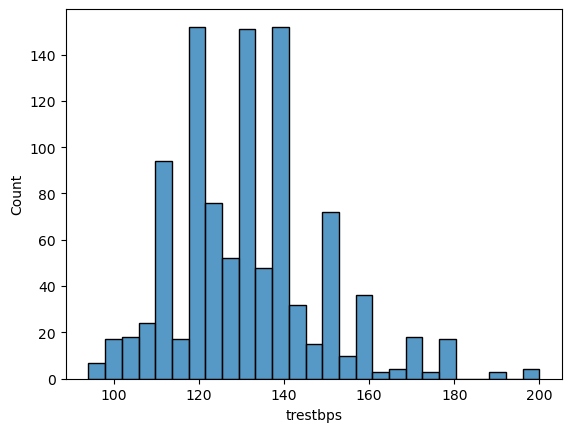

In [101]:
sns.histplot(data=heart_data,x='trestbps')

<Axes: ylabel='oldpeak'>

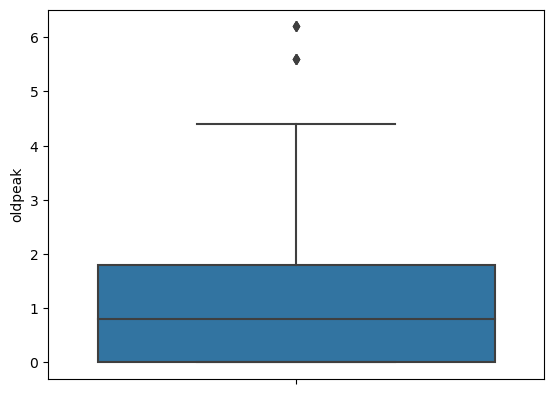

In [83]:
sns.boxplot(data=heart_data,y='oldpeak')

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# K Nearest Neighbour

In [85]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
model=knn.fit(x_train,y_train)

In [86]:
y_pred=model.predict(x_train)


In [87]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       390
           1       0.91      0.90      0.91       430

    accuracy                           0.90       820
   macro avg       0.90      0.90      0.90       820
weighted avg       0.90      0.90      0.90       820



In [88]:
print(confusion_matrix(y_train,y_pred))

[[352  38]
 [ 42 388]]


In [89]:
y_pred=model.predict(x_test)

In [90]:
print (confusion_matrix(y_test,y_pred))

[[79 30]
 [27 69]]


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       109
           1       0.70      0.72      0.71        96

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



# Random Forest Classifier

In [92]:
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
y_pred=model.predict(x_train)

In [93]:
print(confusion_matrix(y_train,y_pred))

[[390   0]
 [  0 430]]


In [38]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       430

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [40]:
y_pred=model.predict(x_test)

In [41]:
print(confusion_matrix(y_test,y_t_pred))

[[109   0]
 [  0  96]]


In [42]:
print(classification_report(y_test,y_t_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        96

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

